In [1]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("gpt-5-nano")

llm.invoke("hi")

AIMessage(content='Hi there! How can I help today?  \nI can: explain concepts, help with math or coding problems, draft emails or documents, brainstorm ideas, plan a trip or project, or chat about almost anything. What would you like to do?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 315, 'prompt_tokens': 7, 'total_tokens': 322, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-Cvdeds9oC7gjXFHJ921uyBUdWKvPy', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b9c42-7f0d-7171-ac48-12fc89331bc3-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 7, 'output_tokens': 315, 'total_tokens': 322, 'input_token_details': {'au

In [10]:
from langchain.tools import tool

@tool
def send_email(to:str, subject:str, content:str):
    """Send email """
    return f"Email has been send to : {to} , with subject :{subject} and content: {content}"

In [11]:
llm_with_tool = llm.bind_tools([send_email], tool_choice="any", parallel_tool_calls=False)

In [2]:
email_input = {
  "author": "Alice Smith <alice.smith@company.com>",
  "to": "John Doe <john.doe@company.com>",
  "subject": "Quick question about API documentation",
  "email_thread": "Hi John,\nI was reviewing the API documentation for the new authentication service and noticed a few endpoints seem to be missing from the specs. Could you help clarify if this was intentional or if we should update the docs?\nSpecifically, I'm looking at:\n- /auth/refresh\n- /auth/validate\nThanks!\nAlice"
}


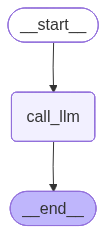

In [ ]:
from langgraph.graph import START, END, MessagesState, StateGraph
from IPython.display import display, Image
def call_llm(state:MessagesState):
    return {"messages" :llm_with_tool.invoke(state["messages"])}


def run_tool(state:MessagesState):
     tool_args = state["messages"][-1].tool_calls.tool_calls[0]["args"]
        out = send_email.invoke(**tool_args)


def should_continue(state:MessagesState):
    if state["messages"][-1].tool_calls:
        return "run_tool"
    else:
        END

graph = StateGraph(MessagesState)
# add node
graph.add_node("call_llm", call_llm)
# add edge
graph.add_edge(START, "call_llm")
graph.add_edge("call_llm", END)

graph = graph.compile()

display(Image(graph.get_graph().draw_mermaid_png()))



In [15]:
out = graph.invoke({"messages": "Send an email to john wick about tomorrow's meeting"})
out

{'messages': [HumanMessage(content="Send an email to john wick about tomorrow's meeting", additional_kwargs={}, response_metadata={}, id='f193c00d-ae34-49d0-ade2-b7b1802fe9c2'),
  AIMessage(content='', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 991, 'prompt_tokens': 139, 'total_tokens': 1130, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 896, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-Cve8XwNDsww6BJtxKT6LI2qHdXBvN', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='lc_run--019b9c5e-cb8b-7040-8626-cf04f3ab43c8-0', tool_calls=[{'name': 'send_email', 'args': {'to': 'john.wick@example.com', 'subject': "Reminder: Tomorrow's meeting", 'content': 'Hi John,\n\nThis is a reminder about our meet

In [21]:
out["messages"][-1].tool_calls[0]["args"]

{'to': 'john.wick@example.com',
 'subject': "Reminder: Tomorrow's meeting",
 'content': 'Hi John,\n\nThis is a reminder about our meeting scheduled for tomorrow. Please let me know if the time works for you or if you need to adjust anything. If you have any agenda items, feel free to share them.\n\nBest regards,\n[Your Name]'}